<a href="https://colab.research.google.com/github/jjoseph2008/INSE6220/blob/main/facebook%20metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Upload File**

In [66]:
from google.colab import files
uploaded = files.upload()

Saving dataset_Facebook_edit_nan_test.csv to dataset_Facebook_edit_nan_test.csv


In [72]:
#read cvs file into dataframe
#df = pd.read_csv('https://raw.githubusercontent.com/jjoseph2008/INSE6220/main/dataset_Facebook_edit_nan.csv',nrows=300)
df = pd.read_csv('dataset_Facebook_edit_nan_test.csv')
df.head(n=10)

,Type,Lifetime Post Total Reach,Lifetime Engaged Users,comment,like,share,Total Interactions
0,Photo,2752,178,4,79,17,100
1,Status,10460,1457,5,130,29,164
2,Photo,2413,177,0,66,14,80
3,Photo,50128,2211,58,1572,147,1777
4,Photo,7244,671,19,325,49,393
5,Status,10472,1191,1,152,33,186
6,Photo,11692,481,3,249,27,279
7,Photo,13720,537,0,325,14,339
8,Status,11844,1530,0,161,31,192
9,Photo,4694,280,3,113,26,142


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Type                       496 non-null    object
 1   Lifetime Post Total Reach  496 non-null    int64 
 2   Lifetime Engaged Users     496 non-null    int64 
 3   comment                    496 non-null    int64 
 4   like                       496 non-null    int64 
 5   share                      496 non-null    int64 
 6   Total Interactions         496 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 27.2+ KB


In [74]:
df.columns

Index(['Type', 'Lifetime Post Total Reach', 'Lifetime Engaged Users',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [75]:
#df.dropna()
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum() )
#df1 = df[df.isna().any(axis=1)]
#df1.head()

Number of rows with NaNs is:  0


### **Classes**

In [76]:
Y = df['Type']
Y.head()

0     Photo
1    Status
2     Photo
3     Photo
4     Photo
Name: Type, dtype: object

### **Features**

In [77]:
# Visualize features with proper names
df = df[['Lifetime Post Total Reach', 'Lifetime Engaged Users',
       'comment', 'like', 'share', 'Total Interactions']]
df.head(10)

,Lifetime Post Total Reach,Lifetime Engaged Users,comment,like,share,Total Interactions
0,2752,178,4,79,17,100
1,10460,1457,5,130,29,164
2,2413,177,0,66,14,80
3,50128,2211,58,1572,147,1777
4,7244,671,19,325,49,393
5,10472,1191,1,152,33,186
6,11692,481,3,249,27,279
7,13720,537,0,325,14,339
8,11844,1530,0,161,31,192
9,4694,280,3,113,26,142


In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Total Reach,496.0,14008.262097,22802.267837,238.0,3331.5,5290.0,13232.00,180480.0
Lifetime Engaged Users,496.0,926.098790,986.849557,9.0,399.0,628.0,1062.00,11452.0
comment,496.0,7.542339,21.255593,0.0,1.0,3.0,7.00,372.0
like,496.0,178.967742,324.108473,0.0,57.0,101.0,188.00,5172.0
share,496.0,27.266129,42.613292,0.0,10.0,19.0,32.25,790.0
Total Interactions,496.0,213.776210,381.315565,0.0,72.0,125.0,230.50,6334.0


Notice that the data is not standardizd.

In [79]:
from sklearn.preprocessing import MinMaxScaler

# Scale features
minmax = MinMaxScaler(feature_range = (0, 1))
df[['Lifetime Post Total Reach', 'Lifetime Engaged Users',
       'comment', 'like', 'share', 'Total Interactions']] = minmax.fit_transform(df[['Lifetime Post Total Reach', 'Lifetime Engaged Users',
       'comment', 'like', 'share', 'Total Interactions']])
df[['Lifetime Post Total Reach', 'Lifetime Engaged Users',
       'comment', 'like', 'share', 'Total Interactions']].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Lifetime Post Total Reach,Lifetime Engaged Users,comment,like,share,Total Interactions
0,0.013948,0.014769,0.010753,0.015275,0.021519,0.015788
1,0.056713,0.126540,0.013441,0.025135,0.036709,0.025892
2,0.012067,0.014681,0.000000,0.012761,0.017722,0.012630
3,0.276795,0.192432,0.155914,0.303944,0.186076,0.280549
4,0.038870,0.057852,0.051075,0.062838,0.062025,0.062046


In [80]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Total Reach,496.0,0.076399,0.126509,0.0,0.017163,0.028029,0.072092,1.0
Lifetime Engaged Users,496.0,0.080145,0.086240,0.0,0.034082,0.054094,0.092021,1.0
comment,496.0,0.020275,0.057139,0.0,0.002688,0.008065,0.018817,1.0
like,496.0,0.034603,0.062666,0.0,0.011021,0.019528,0.036350,1.0
share,496.0,0.034514,0.053941,0.0,0.012658,0.024051,0.040823,1.0
Total Interactions,496.0,0.033751,0.060201,0.0,0.011367,0.019735,0.036391,1.0


Notice that the data is now standardizd.

**Observations and variables**

In [81]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

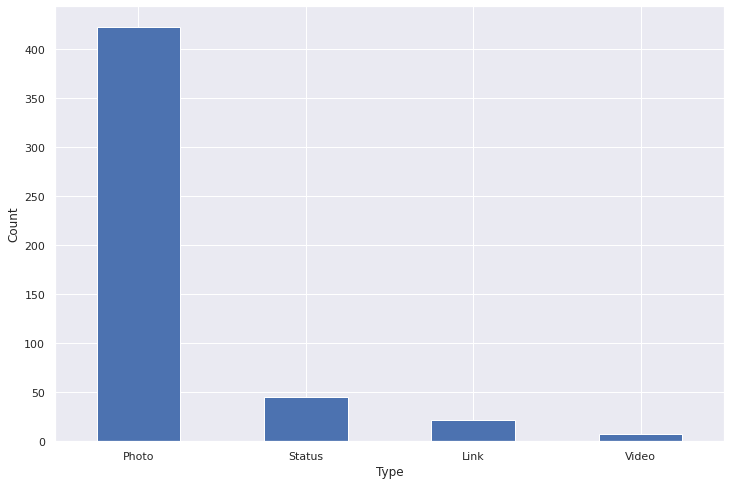

In [82]:
Y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

[Text(0, 0, 'Lifetime Post Total Reach'),
 Text(0, 0, 'Lifetime Engaged Users'),
 Text(0, 0, 'comment'),
 Text(0, 0, 'like'),
 Text(0, 0, 'share'),
 Text(0, 0, 'Total Interactions')]

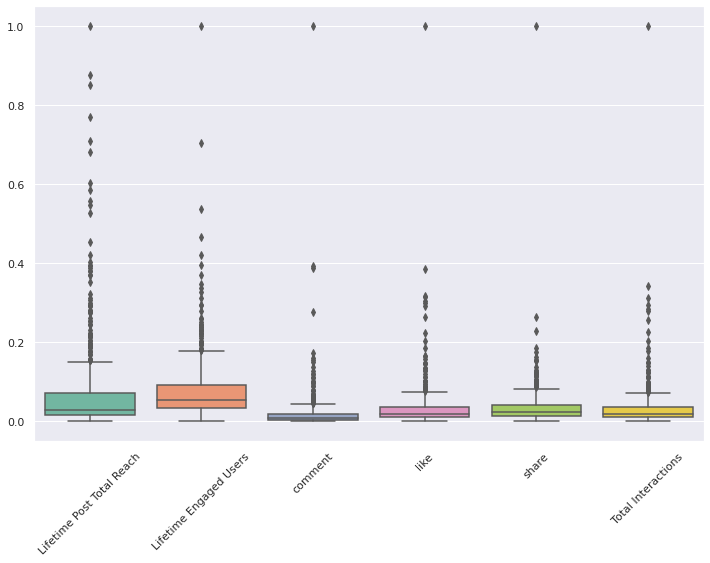

In [83]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'Lifetime Post Total Reach'),
 Text(0, 0, 'Lifetime Engaged Users'),
 Text(0, 0, 'comment'),
 Text(0, 0, 'like'),
 Text(0, 0, 'share'),
 Text(0, 0, 'Total Interactions')]

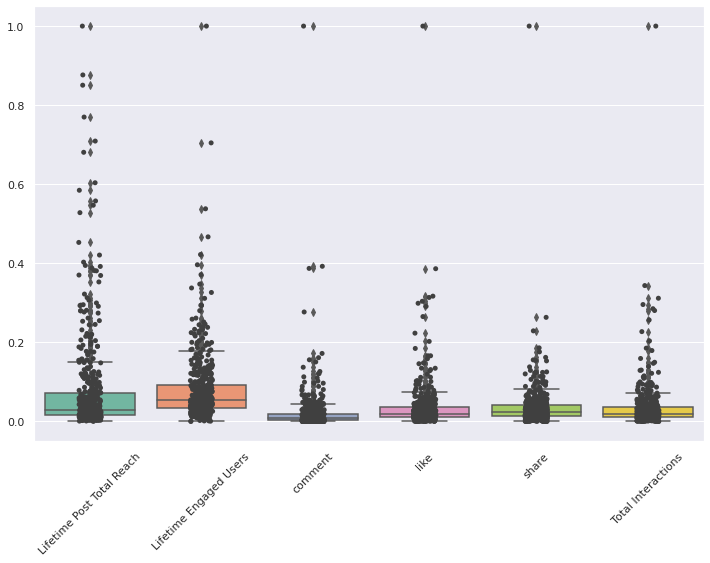

In [84]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### Five Number Summary

In [85]:
df.describe()

,Lifetime Post Total Reach,Lifetime Engaged Users,comment,like,share,Total Interactions
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,0.076399,0.080145,0.020275,0.034603,0.034514,0.033751
std,0.126509,0.086240,0.057139,0.062666,0.053941,0.060201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.017163,0.034082,0.002688,0.011021,0.012658,0.011367
50%,0.028029,0.054094,0.008065,0.019528,0.024051,0.019735
75%,0.072092,0.092021,0.018817,0.036350,0.040823,0.036391
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Pair Plot

<Figure size 864x576 with 0 Axes>

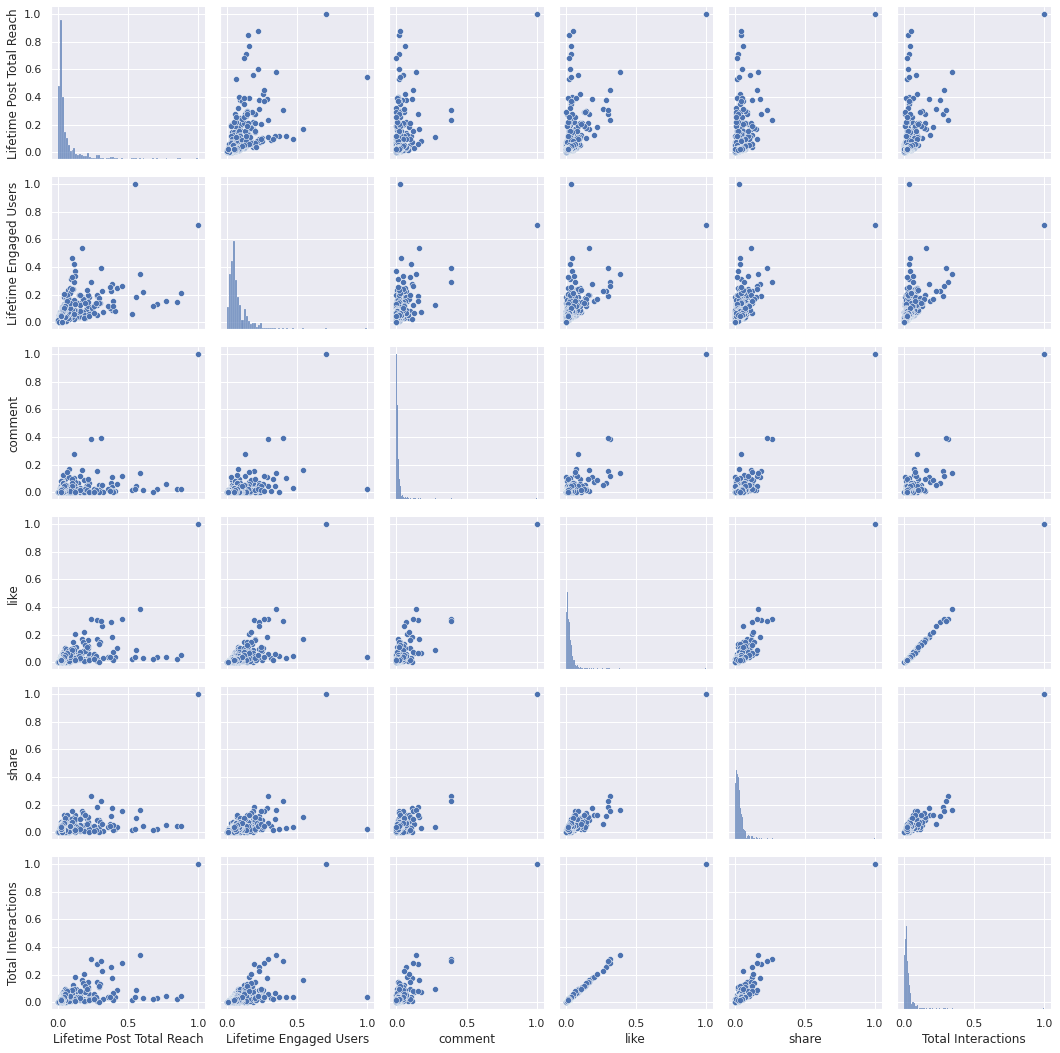

In [86]:
ax = plt.figure()
ax = sns.pairplot(df)

## **Covariance**

[Text(0.5, 1, 'Lifetime Post Total Reach'),
 Text(1.5, 1, 'Lifetime Engaged Users'),
 Text(2.5, 1, 'comment'),
 Text(3.5, 1, 'like'),
 Text(4.5, 1, 'share'),
 Text(5.5, 1, 'Total Interactions')]

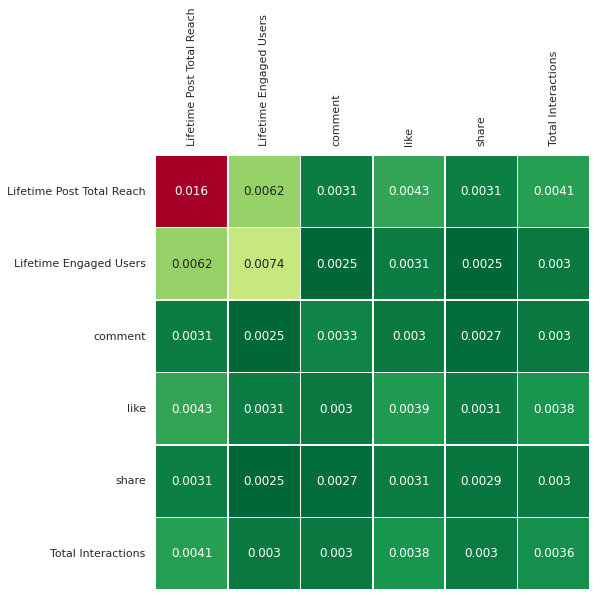

In [87]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

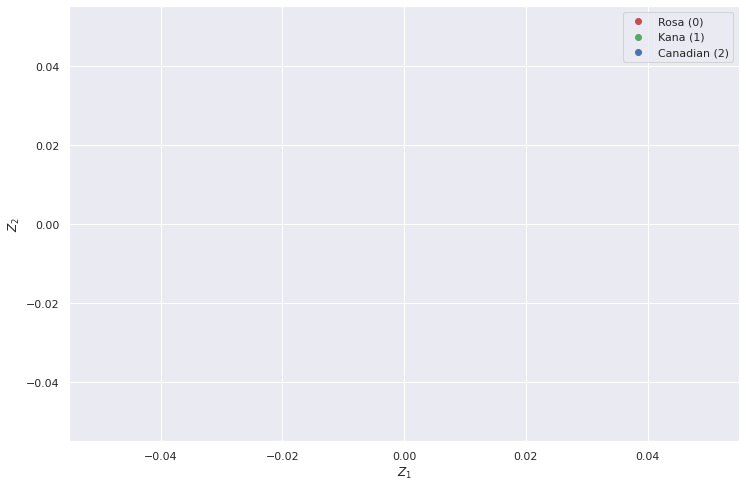

In [88]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(Y == 0)
idx_Kana = np.where(Y == 1)
idx_Canadian = np.where(Y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

Eigenvector matrix:
[[ 7.04152145e-01 -6.64118363e-01 -2.45419125e-01  4.81620639e-02
  -2.37997134e-02 -0.00000000e+00]
 [ 4.13980010e-01  1.04481531e-01  9.04261666e-01 -2.60601321e-03
   2.86519498e-03  1.36851682e-16]
 [ 2.57560401e-01  3.81204364e-01 -1.60539286e-01  8.19789417e-01
   2.97442732e-01  4.52343164e-02]
 [ 3.23103875e-01  3.68163697e-01 -1.92854262e-01 -4.65747548e-01
   3.32305515e-01  6.28902916e-01]
 [ 2.55781682e-01  3.62713653e-01 -1.56135784e-01  3.31304143e-02
  -8.76533284e-01  9.60621236e-02]
 [ 3.10857790e-01  3.68249835e-01 -1.86376717e-01 -3.28025202e-01
   1.79487137e-01 -7.70199356e-01]]


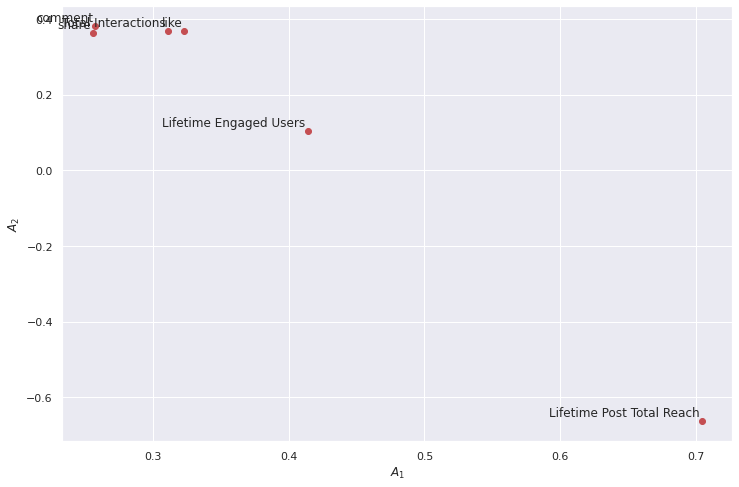

In [89]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


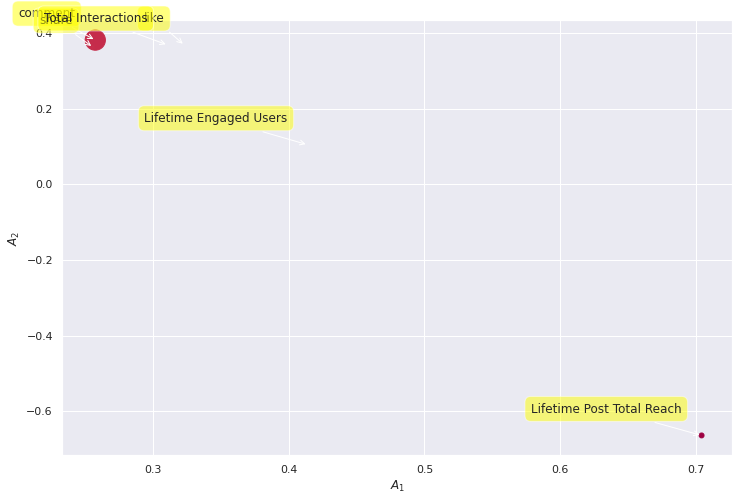

In [90]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

Eigenvalues:
[2.57014887e-02 6.89593246e-03 3.61680714e-03 6.51489513e-04
 3.01951978e-04 4.78931956e-34]


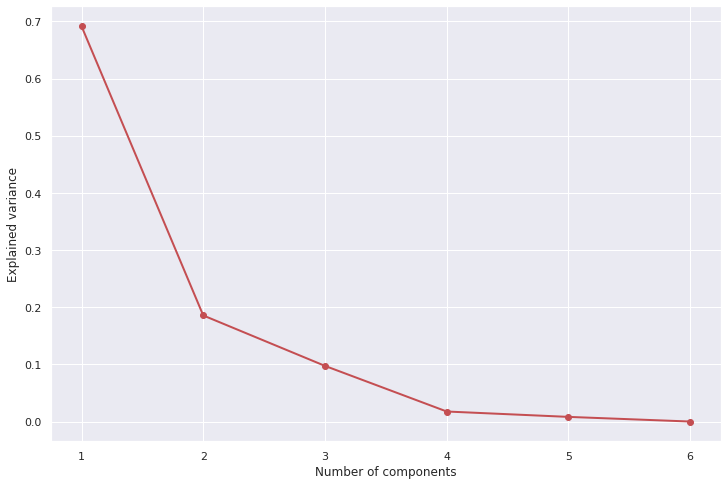

Explained variance per component:
[6.91501212e-01 1.85535776e-01 9.73105702e-02 1.75283928e-02
 8.12404922e-03 1.28857138e-32]


In [91]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')
#'Area', 'Perimeter', 'Comp', 'Length_kernel', 'Width', 'Asymmetry', 'Length_groove'

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

print(f'Explained variance per component:\n{(Lambda/sum(Lambda))}')

### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

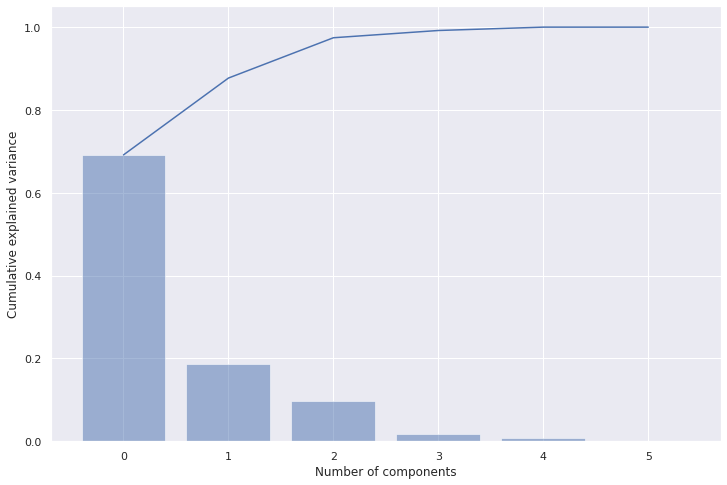

In [92]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### **Biplot**

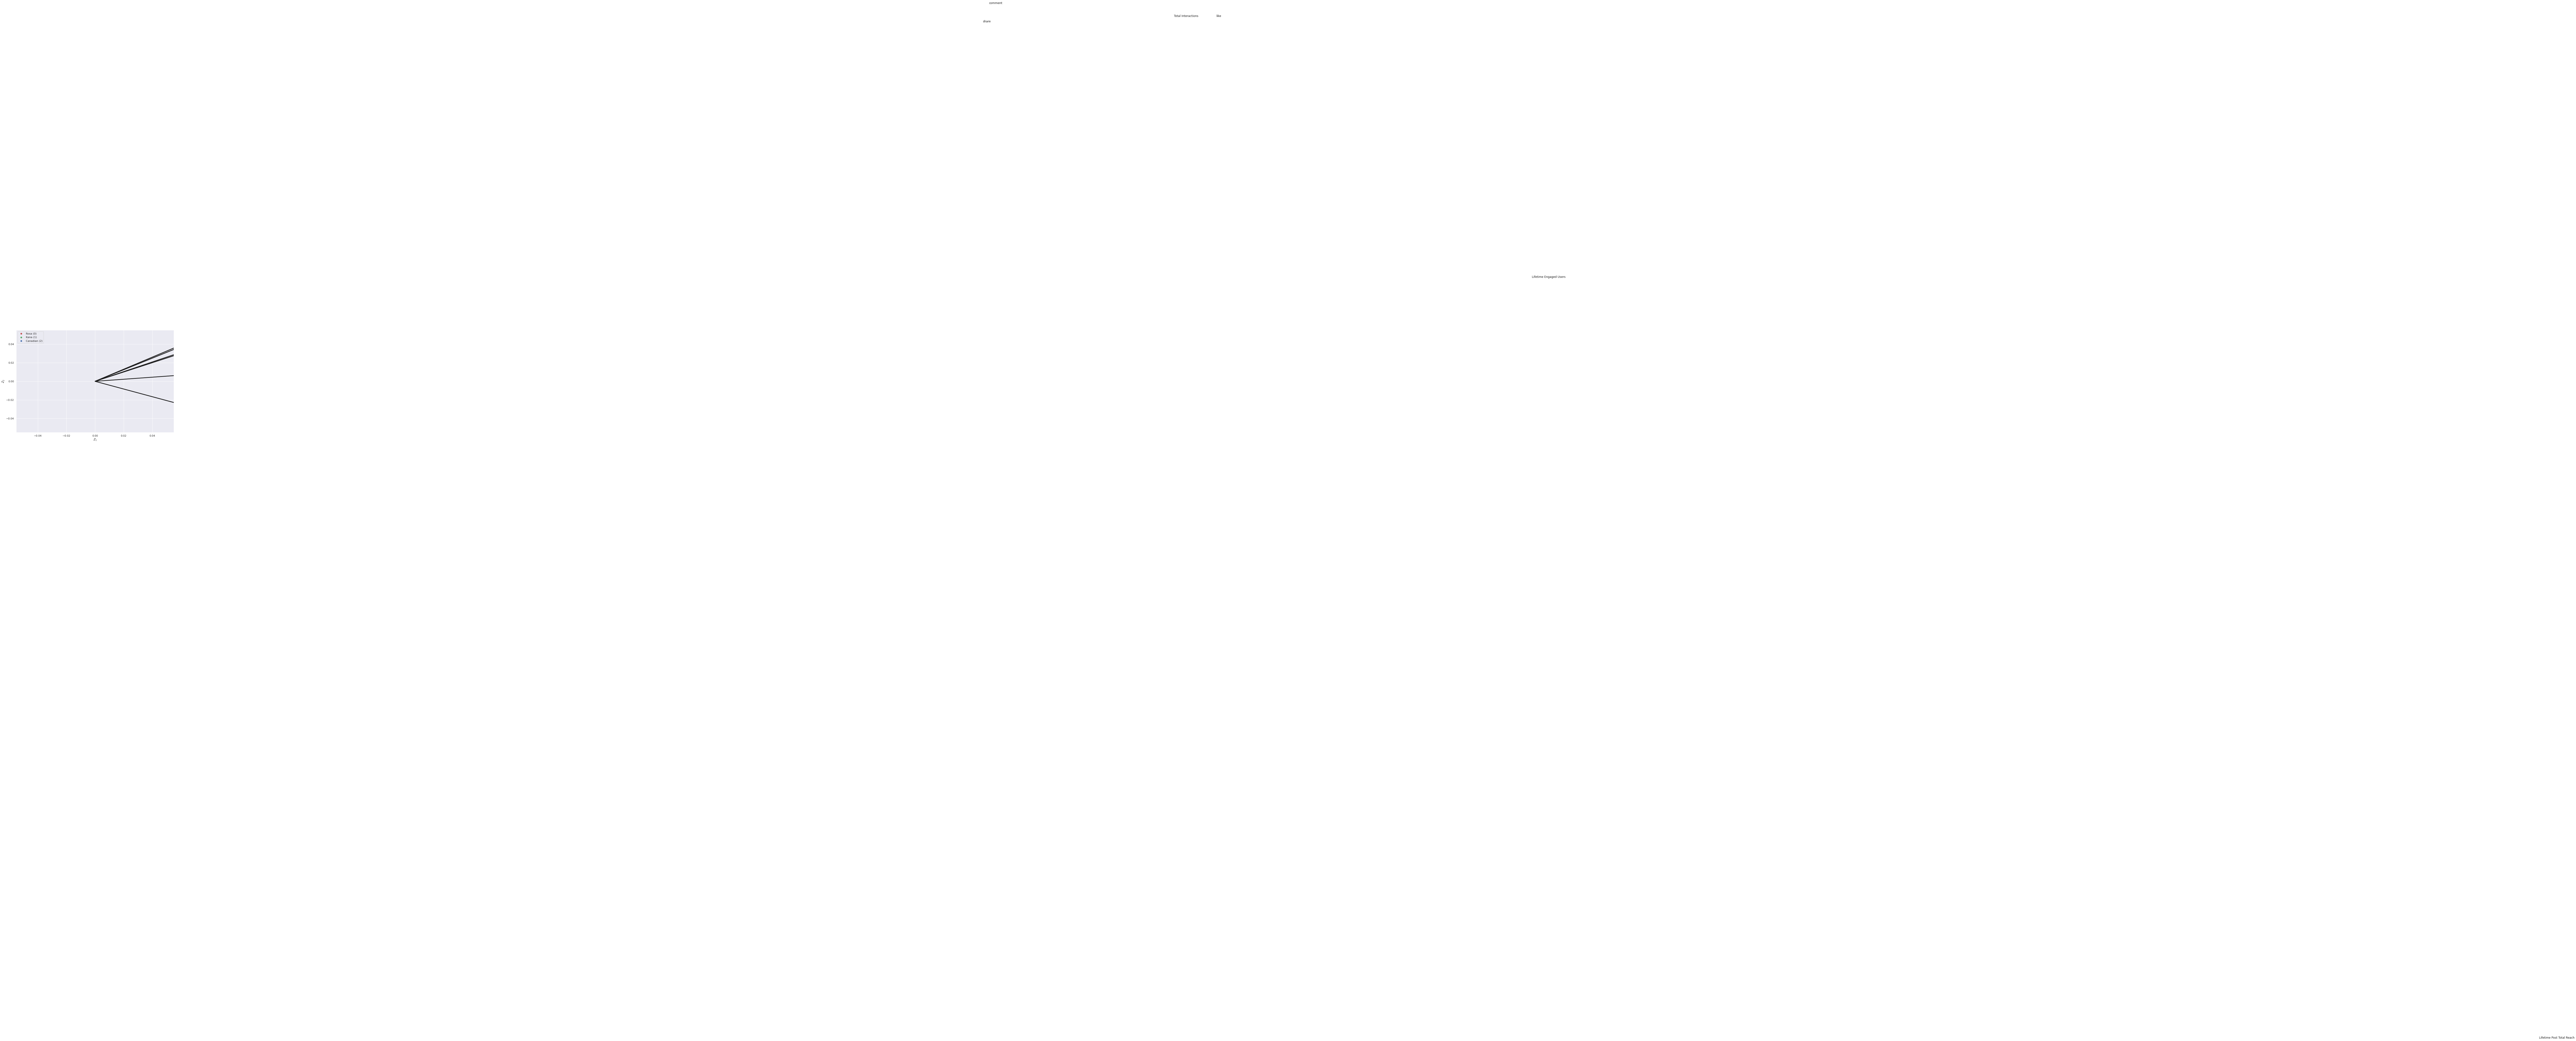

In [93]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

### **Principal components**

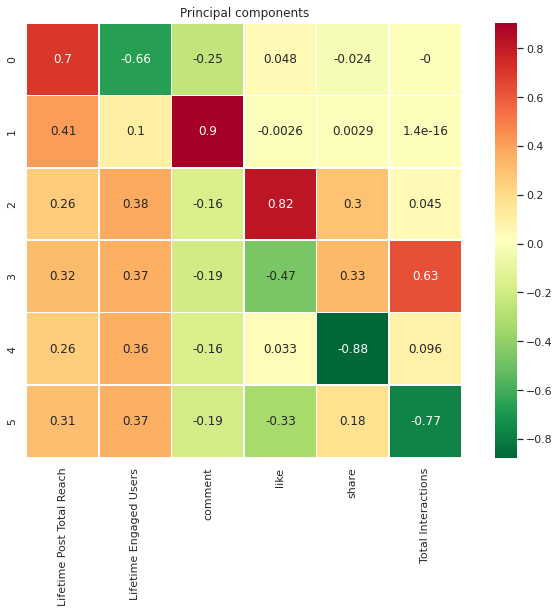

PC1:[0.70415214 0.41398001 0.2575604  0.32310388 0.25578168 0.31085779]
PC2:[-0.66411836  0.10448153  0.38120436  0.3681637   0.36271365  0.36824983]


In [94]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

#'Area', 'Perimeter', 'Comp', 'Length_kernel', 'Width', 'Asymmetry', 'Length_groove'
print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

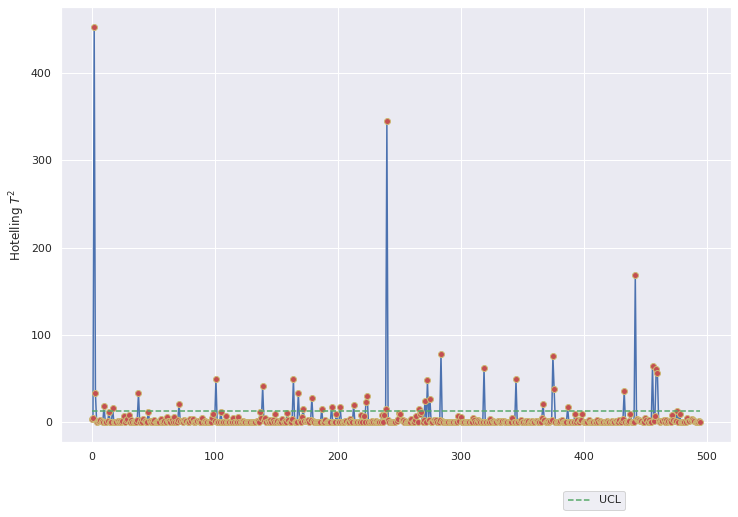

In [95]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [96]:
print(np.argwhere(Tsquare>UCL))

[[  2]
 [  3]
 [ 10]
 [ 17]
 [ 38]
 [ 71]
 [101]
 [139]
 [164]
 [168]
 [172]
 [179]
 [187]
 [195]
 [202]
 [213]
 [223]
 [224]
 [239]
 [240]
 [266]
 [271]
 [273]
 [275]
 [284]
 [319]
 [345]
 [367]
 [375]
 [376]
 [387]
 [433]
 [442]
 [456]
 [459]
 [460]
 [476]]


### **Control Charts for Principal Components**

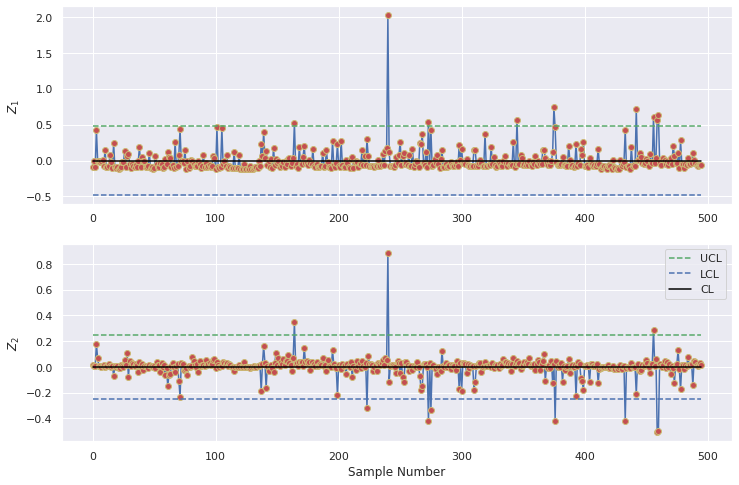

In [97]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [98]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[164]
 [240]
 [273]
 [345]
 [375]
 [442]
 [456]
 [459]
 [460]]
[[223]
 [273]
 [275]
 [376]
 [433]
 [459]
 [460]]
[[164]
 [240]
 [456]]


## **Multi-Class Classification**

In [99]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 347
Test Dataset Size: 149


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

        Link      0.082     0.857     0.150         7
       Photo      0.881     0.419     0.568       124
      Status      0.533     0.615     0.571        13
       Video      0.000     0.000     0.000         5

    accuracy                          0.443       149
   macro avg      0.374     0.473     0.322       149
weighted avg      0.784     0.443     0.530       149



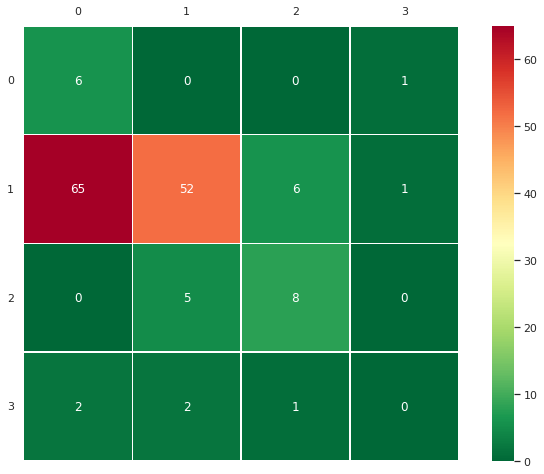

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

        Link      0.600     0.429     0.500         7
       Photo      0.923     0.968     0.945       124
      Status      0.700     0.538     0.609        13
       Video      0.250     0.200     0.222         5

    accuracy                          0.879       149
   macro avg      0.618     0.534     0.569       149
weighted avg      0.866     0.879     0.870       149



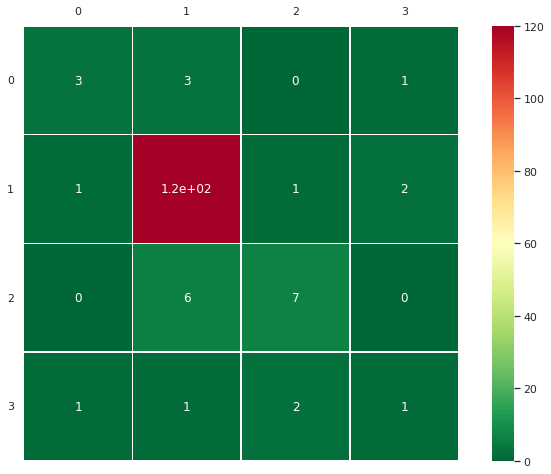

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

        Link      0.000     0.000     0.000         7
       Photo      0.836     0.984     0.904       124
      Status      0.000     0.000     0.000        13
       Video      0.333     0.200     0.250         5

    accuracy                          0.826       149
   macro avg      0.292     0.296     0.288       149
weighted avg      0.707     0.826     0.760       149



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


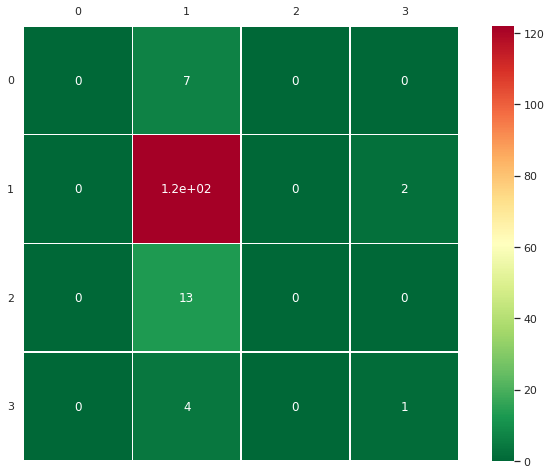

ValueError: ignored

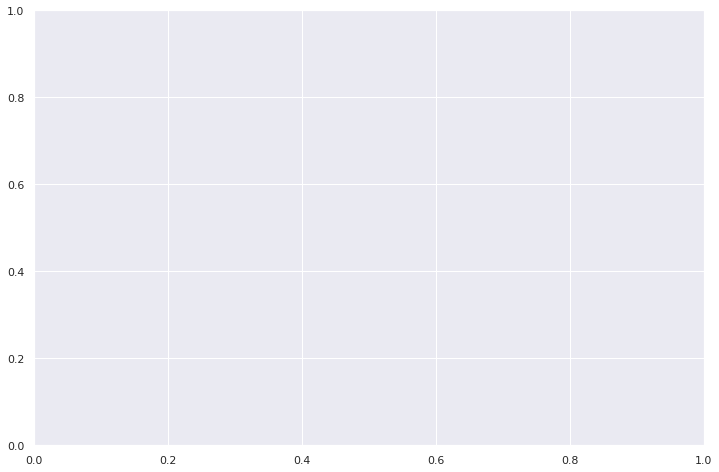

In [100]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

In [ ]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

In [ ]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

In [ ]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()